# tvAR2
# Gaussian Kernel
# Increasing n_replication
# Fixed t=50, T=1000

In [1]:
import sys
import os

sys.path.append(os.path.abspath('D:/ExperimentsPhD/wasslsp/Jan_Experiments'))

In [2]:
import numpy as np
import scipy as scp

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

from src.utils import *
from src.kernels import Kernel

import warnings
warnings.filterwarnings('ignore')

# n_replications = 100

In [3]:
T = 1000
n_replications = 100
d = 2

u_var = np.linspace(0., 1., T)

X_tvar_2 = np.zeros(T)
X_tvar_2_mean = np.zeros(T)


m_star = lambda u: 1.4 + np.sin(2 * np.pi * u)
r_star = lambda  u: 1.05
sigma_star = lambda u: 1.0

X_tvar_2_replications = np.zeros((n_replications, T))

X_dict = {}

for replication in range(n_replications):
    np.random.seed(replication)
    t = 2
    epsilon = np.random.normal(size=(T))
    X = np.zeros((T,d))
    while t <= T-1 :
        X_tvar_2[t] = 2 / r_star(t/T) * np.cos(m_star(t/T)) * X_tvar_2[t-1] - \
                        (1. / r_star(t/T) ** 2) * X_tvar_2[t-2] + sigma_star(t/T) * epsilon[t]
        X_tvar_2_mean[t] = 2 / r_star(t/T) * np.cos(m_star(t/T)) * X_tvar_2[t-1] - \
                        (1. / r_star(t/T) ** 2) * X_tvar_2[t-2]
        X[t] = [X_tvar_2[t-1], X_tvar_2[t-2]]
        t += 1
        
    X_dict[str(replication)] = X
    # X_dict.setdefault(str(replication),[]).append(X)
    X_tvar_2_replications[replication] = X_tvar_2

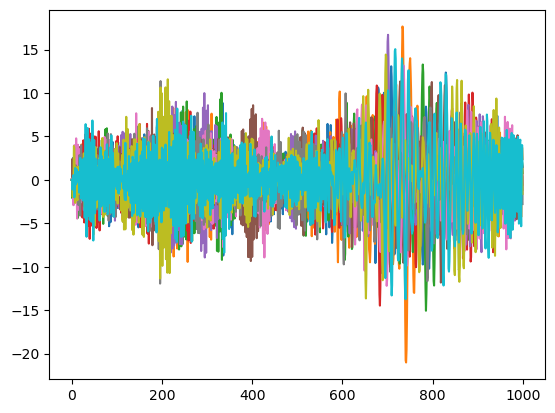

In [4]:
for replication in range(10):
    plt.plot(X_tvar_2_replications[replication])
    #plt.plot(X_tvar_2_replications[replication])

In [5]:
X_dict.keys()

dict_keys(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99'])

In [6]:
t = [10, 20, 50]
X_tvar_2_10 = []
X_tvar_2_20 = []
X_tvar_2_50 = []
for replication in range(n_replications):
    X_tvar_2_10.append(X_tvar_2_replications[replication][9])
    X_tvar_2_20.append(X_tvar_2_replications[replication][19])
    X_tvar_2_50.append(X_tvar_2_replications[replication][49])

In [7]:
X_tvar_2_replications.shape

(100, 1000)

In [8]:
X_tvar_2_10 = np.array(X_tvar_2_10)
X_tvar_2_20 = np.array(X_tvar_2_20)
X_tvar_2_50 = np.array(X_tvar_2_50)

<Axes: >

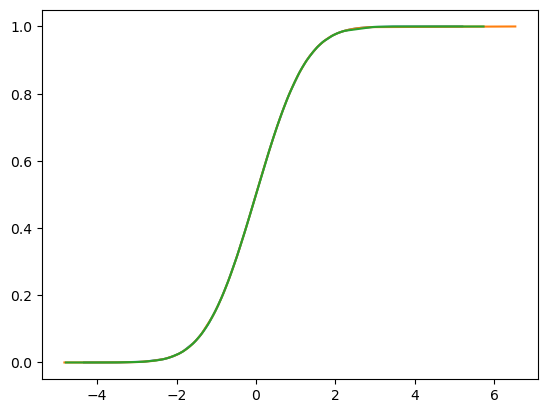

In [9]:
import scipy
import seaborn as sns
norm_X_tvar_2_10 = scipy.stats.norm.cdf(X_tvar_2_10)
norm_X_tvar_2_20 = scipy.stats.norm.cdf(X_tvar_2_20)
norm_X_tvar_2_50 = scipy.stats.norm.cdf(X_tvar_2_50)

sns.lineplot(x=X_tvar_2_10, y=norm_X_tvar_2_10)
sns.lineplot(x=X_tvar_2_20, y=norm_X_tvar_2_20)
sns.lineplot(x=X_tvar_2_50, y=norm_X_tvar_2_50)

In [10]:
## Gaussian 
xi = 0.4 / (2*(d+1))
bandwith = T **(-xi)
t = 50
gaussian_kernel = Kernel(T=T, bandwith=bandwith, space_kernel="gaussian", time_kernel="gaussian")

gaussian_weights = {}
gaussian_weights_ = {}
for replication in range(n_replications):
    gaussian_weights[str(replication)] = gaussian_kernel.fit(X_dict[str(replication)], t)
    gaussian_weights_[str(replication)] = gaussian_weights[str(replication)].sum(axis=0)

In [11]:
weights_10 = {}
weights_20 = {}
weights_50 = {}
for replication in range(n_replications):
    weights_10[str(replication)] = gaussian_weights[str(replication)] 
    weights_20[str(replication)] = gaussian_weights[str(replication)]
    weights_50[str(replication)] = gaussian_weights[str(replication)]


In [12]:
weights_50['0'].shape

(1000,)

In [13]:
import pandas as pd
df_weights = pd.DataFrame(weights_50['0'])
df_weights.head(50)
#plt.plot(weights_10['1'])

,0
0,1.593235e-13
1,1.593433e-13
2,1.593628e-13
3,1.197224e-18
4,2.672910e-31
5,2.316195e-31
6,2.019424e-09
7,3.380133e-07
8,3.550313e-24
9,1.367812e-28


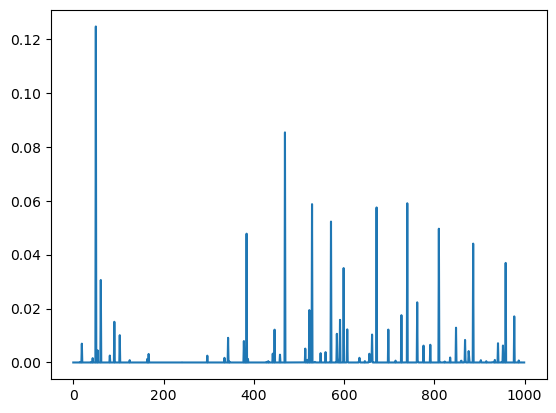

In [14]:
plt.plot(weights_50['0'])

In [15]:
replicated_NW_cdfs_50 = {}
for replication in range(n_replications):
    X_tvar_2_replication_norm = scp.stats.norm.cdf(X_tvar_2_replications[replication])
    replicated_NW_cdfs_50[str(replication)] = weights_50[str(replication)].sum(0)* X_tvar_2_replication_norm # [49] 
    # replicated_NW_cdfs_100[str(replication)] = weights_100[str(replication)]* X_tvar_2_replication_norm 

In [16]:
weights_50['0'].shape

(1000,)

In [17]:
replicated_NW_cdfs_50['0'].shape

(1000,)

<Axes: >

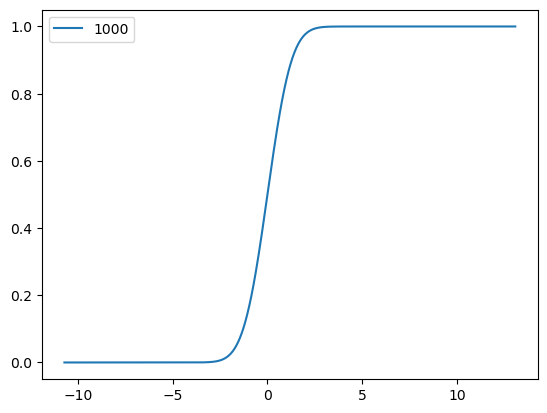

In [18]:
# X_tvar_2_replication_norm[0]
X_tvar_2_replication_norm = scp.stats.norm.cdf(X_tvar_2_replications[0])
# plt.plot(X_tvar_2_replication_norm)

sns.lineplot(x=X_tvar_2_replications[0], y=X_tvar_2_replication_norm, label=f"{T}" )

In [19]:
def eval_univariate(x, weights):
        """Inner function for ECDF of one variable."""
        sorter = x.argsort()
        x = x[sorter]
        weights = weights[sorter]
        y = weights.cumsum()

        # if self.stat in ["percent", "proportion"]:
        y = y / y.max()
        # if self.stat == "percent":
            # y = y * 100

        # x = np.r_[-np.inf, x]
        # y = np.r_[0, y]
        x = np.r_[x]
        y = np.r_[y]

        # if self.complementary:
            # y = y.max() - y

        return y, x

(100, 1000) (100, 1000)


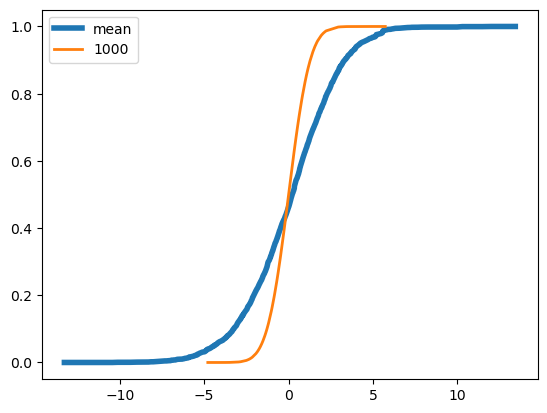

Wasserstein distance for each replication:  [0.20752268479597127, 0.1882018598476283, 0.11294534398997985, 0.18165289304093293, 0.08238384815278985, 0.028254338001053248, 0.10019346454501452, 0.08688516719235274, 0.2102952925732876, 0.2623435602438772, 0.04588622880397553, 0.12315327828653183, 0.3498314373711581, 0.21017630368992893, 0.1328094598083206, 0.01957333133011932, 0.0636696706114834, 0.1232831631708287, 0.3023658600355467, 0.024573502752847275, 0.06702177795060643, 0.034139104894924145, 0.1254559304207843, 0.0959116487996836, 0.06876010635116139, 0.12435745610613969, 0.20500567144435117, 0.2547283361205615, 0.16346389430757777, 0.2506149873459943, 0.17029352692431293, 0.10325416448714603, 0.16510905413589283, 0.22549796161966038, 0.13221764005865724, 0.05073672799158997, 0.038780833621309525, 0.3576516574050162, 0.04787747481609707, 0.08140310717797745, 0.20198299056061925, 0.15371759286054013, 0.2227714973715508, 0.12356645588080221, 0.07536161645424776, 0.23809691117530776,

In [20]:
from scipy.stats import wasserstein_distance
x_rep = np.zeros((n_replications, T))
y_rep = np.zeros((n_replications, T))
wasserstein_distances = []
for replication in range(n_replications): #range(n_replications):
   # sns.lineplot(x=X_tvar_2_replications[replication], y=replicated_NW_cdfs_100[str(replication)])
   # plt.ecdf(X_tvar_2_replications[replication], weights=weights_100[str(replication)][99])
   # sns.ecdfplot(data=None, x=X_tvar_2_replications[replication], weights=weights_100[str(replication)][99])
   # data = X_tvar_2_replications[replication] * weights_100[str(replication)][99]
   # plt.plot(np.sort(a), np.linspace(0., 1., len(a), endpoint=False), c='g',lw=2)
   # plt.plot(np.sort(data), np.arange(1, len(data)+1) / len(data))
    y, x = eval_univariate(X_tvar_2_replications[replication], weights_50[str(replication)])
    x_rep[replication] = x
    y_rep[replication] = y
    distance = wasserstein_distance(y, scp.stats.norm.cdf(X_tvar_2_50))
    wasserstein_distances.append(distance)
   
   
   #plt.plot(x, y, label=str(replication))
print(x_rep.shape, y_rep.shape)
plt.plot(x_rep.mean(axis=0), y_rep.mean(axis=0), label="mean", linewidth=4)
X_tvar_2_50_norm = scp.stats.norm.cdf(X_tvar_2_50)
sns.lineplot(x=X_tvar_2_50, y=X_tvar_2_50_norm, label=f"{T}", linewidth=2 )
# eval_univariate(X_tvar_2_100_norm)
# plt.legend()
plt.show()

#print("Mean values of y_rep across replications:", y_rep.mean(axis=0))
#y_rep.mean(axis=0).shape
print("Wasserstein distance for each replication: ", wasserstein_distances)

In [21]:
#x_mean_pi_NW_cdfs_50 = x_rep.mean(axis=0)
y_mean_pi_NW_cdfs_50 = y_rep.mean(axis=0)

In [22]:
from scipy.stats import wasserstein_distance
wasserstein_distance(y_mean_pi_NW_cdfs_50, X_tvar_2_50_norm)

0.08903417180758809

In [24]:
1 / (T**.5 *bandwith**(d+1))  + bandwith

0.75684988565961

# n_replications=200

In [25]:
T = 1000
n_replications = 200
d = 2

u_var = np.linspace(0., 1., T)

X_tvar_2 = np.zeros(T)
X_tvar_2_mean = np.zeros(T)


m_star = lambda u: 1.4 + np.sin(2 * np.pi * u)
r_star = lambda  u: 1.05
sigma_star = lambda u: 1.0

X_tvar_2_replications = np.zeros((n_replications, T))

X_dict = {}

for replication in range(n_replications):
    np.random.seed(replication)
    t = 2
    epsilon = np.random.normal(size=(T))
    X = np.zeros((T,d))
    while t <= T-1 :
        X_tvar_2[t] = 2 / r_star(t/T) * np.cos(m_star(t/T)) * X_tvar_2[t-1] - \
                        (1. / r_star(t/T) ** 2) * X_tvar_2[t-2] + sigma_star(t/T) * epsilon[t]
        X_tvar_2_mean[t] = 2 / r_star(t/T) * np.cos(m_star(t/T)) * X_tvar_2[t-1] - \
                        (1. / r_star(t/T) ** 2) * X_tvar_2[t-2]
        X[t] = [X_tvar_2[t-1], X_tvar_2[t-2]]
        t += 1
        
    X_dict[str(replication)] = X
    # X_dict.setdefault(str(replication),[]).append(X)
    X_tvar_2_replications[replication] = X_tvar_2

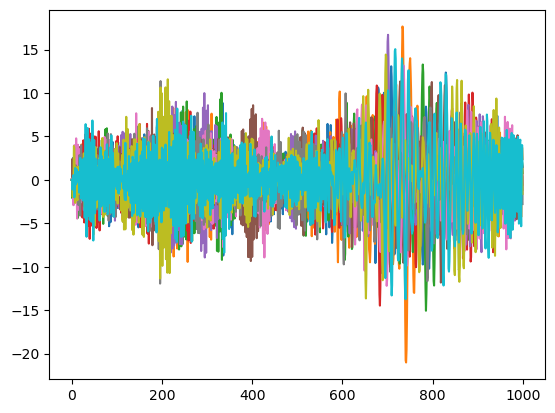

In [26]:
for replication in range(10):
    plt.plot(X_tvar_2_replications[replication])
    #plt.plot(X_tvar_2_replications[replication])

In [27]:
t = [10, 20, 50]
X_tvar_2_10 = []
X_tvar_2_20 = []
X_tvar_2_50 = []
for replication in range(n_replications):
    X_tvar_2_10.append(X_tvar_2_replications[replication][9])
    X_tvar_2_20.append(X_tvar_2_replications[replication][19])
    X_tvar_2_50.append(X_tvar_2_replications[replication][49])

X_tvar_2_10 = np.array(X_tvar_2_10)
X_tvar_2_20 = np.array(X_tvar_2_20)
X_tvar_2_50 = np.array(X_tvar_2_50)

<Axes: >

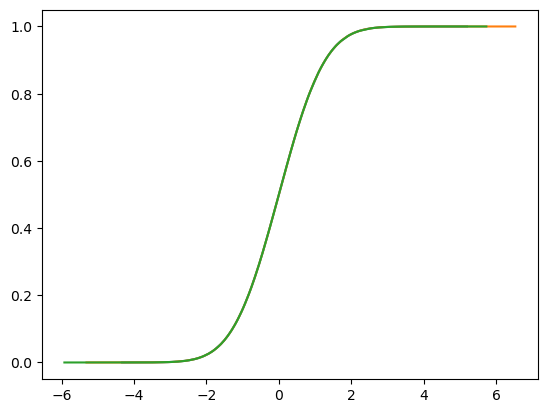

In [28]:
import scipy
import seaborn as sns
norm_X_tvar_2_10 = scipy.stats.norm.cdf(X_tvar_2_10)
norm_X_tvar_2_20 = scipy.stats.norm.cdf(X_tvar_2_20)
norm_X_tvar_2_50 = scipy.stats.norm.cdf(X_tvar_2_50)

sns.lineplot(x=X_tvar_2_10, y=norm_X_tvar_2_10)
sns.lineplot(x=X_tvar_2_20, y=norm_X_tvar_2_20)
sns.lineplot(x=X_tvar_2_50, y=norm_X_tvar_2_50)

In [29]:
## Gaussian 
xi = 0.4 / (2*(d+1))
bandwith = T **(-xi)
t = 50
gaussian_kernel = Kernel(T=T, bandwith=bandwith, space_kernel="gaussian", time_kernel="gaussian")

gaussian_weights = {}
gaussian_weights_ = {}
for replication in range(n_replications):
    gaussian_weights[str(replication)] = gaussian_kernel.fit(X_dict[str(replication)], t)
    gaussian_weights_[str(replication)] = gaussian_weights[str(replication)].sum(axis=0)
    

weights_10 = {}
weights_20 = {}
weights_50 = {}
for replication in range(n_replications):
    weights_10[str(replication)] = gaussian_weights[str(replication)] 
    weights_20[str(replication)] = gaussian_weights[str(replication)]
    weights_50[str(replication)] = gaussian_weights[str(replication)]


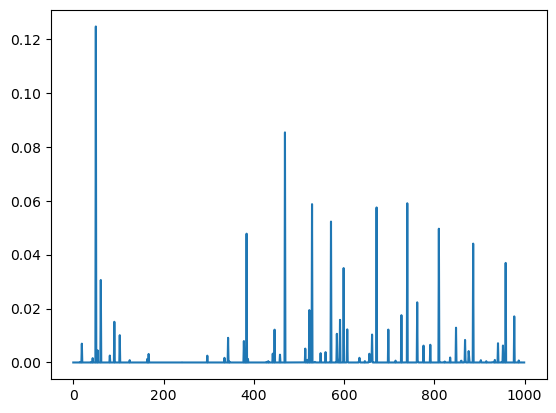

In [30]:
import pandas as pd
df_weights = pd.DataFrame(weights_50['0'])
df_weights.head(50)
#plt.plot(weights_10['1'])

plt.plot(weights_50['0'])

In [31]:
replicated_NW_cdfs_50 = {}
for replication in range(n_replications):
    X_tvar_2_replication_norm = scp.stats.norm.cdf(X_tvar_2_replications[replication])
    replicated_NW_cdfs_50[str(replication)] = weights_50[str(replication)].sum(0)* X_tvar_2_replication_norm # [49] 
    # replicated_NW_cdfs_100[str(replication)] = weights_100[str(replication)]* X_tvar_2_replication_norm 

<Axes: >

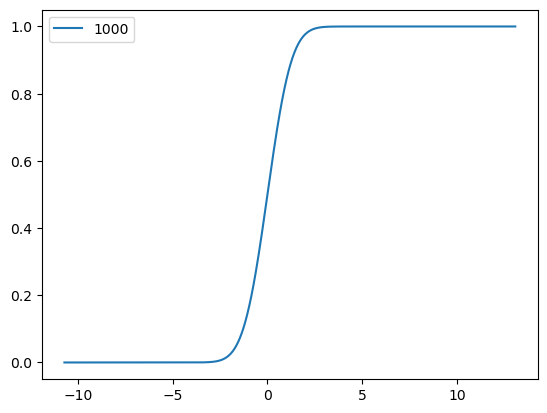

In [32]:
# X_tvar_2_replication_norm[0]
X_tvar_2_replication_norm = scp.stats.norm.cdf(X_tvar_2_replications[0])
# plt.plot(X_tvar_2_replication_norm)

sns.lineplot(x=X_tvar_2_replications[0], y=X_tvar_2_replication_norm, label=f"{T}" )

(200, 1000) (200, 1000)


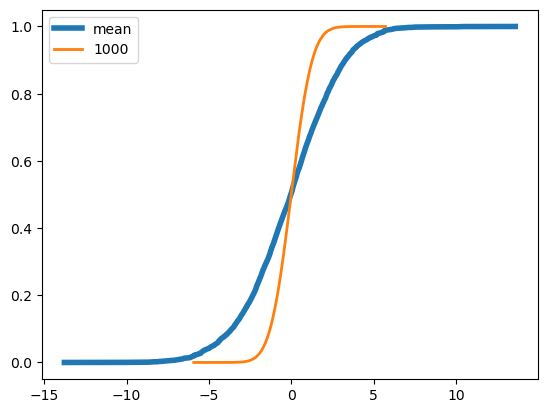

Wasserstein distance for each replication:  [0.20719433934393167, 0.2050967915841277, 0.12987257387516904, 0.172833748160503, 0.07838598442362416, 0.016694496872547065, 0.11719052168843389, 0.09358216644694242, 0.2254780170835471, 0.27909388360431325, 0.02993745747728629, 0.1241476918228342, 0.36675197711380436, 0.1932483339011053, 0.13355392342199335, 0.019315106586930166, 0.06626652082971678, 0.11491863715109316, 0.28543769245756234, 0.03496143985564728, 0.050036617456413586, 0.03006126686571438, 0.12938827540593065, 0.09743047337619815, 0.07564534770941461, 0.12189211428164562, 0.18807787002533197, 0.2378004243274419, 0.1465356845106861, 0.26753208381279064, 0.17048212666999638, 0.1043337452645309, 0.17428813421681266, 0.20856987601823165, 0.14904617054595826, 0.0637883541458155, 0.052170872685107214, 0.3407236480638456, 0.044213293822175495, 0.06500999613995682, 0.18505442665928018, 0.17026358264869731, 0.22362024493454025, 0.14022870038246554, 0.0637191658883094, 0.221168970300015

In [34]:
from scipy.stats import wasserstein_distance
x_rep = np.zeros((n_replications, T))
y_rep = np.zeros((n_replications, T))
wasserstein_distances = []
for replication in range(n_replications): #range(n_replications):
   # sns.lineplot(x=X_tvar_2_replications[replication], y=replicated_NW_cdfs_100[str(replication)])
   # plt.ecdf(X_tvar_2_replications[replication], weights=weights_100[str(replication)][99])
   # sns.ecdfplot(data=None, x=X_tvar_2_replications[replication], weights=weights_100[str(replication)][99])
   # data = X_tvar_2_replications[replication] * weights_100[str(replication)][99]
   # plt.plot(np.sort(a), np.linspace(0., 1., len(a), endpoint=False), c='g',lw=2)
   # plt.plot(np.sort(data), np.arange(1, len(data)+1) / len(data))
    y, x = eval_univariate(X_tvar_2_replications[replication], weights_50[str(replication)])
    x_rep[replication] = x
    y_rep[replication] = y
    distance = wasserstein_distance(y, scp.stats.norm.cdf(X_tvar_2_50))
    wasserstein_distances.append(distance)
   
   
   #plt.plot(x, y, label=str(replication))
print(x_rep.shape, y_rep.shape)
plt.plot(x_rep.mean(axis=0), y_rep.mean(axis=0), label="mean", linewidth=4)
X_tvar_2_50_norm = scp.stats.norm.cdf(X_tvar_2_50)
sns.lineplot(x=X_tvar_2_50, y=X_tvar_2_50_norm, label=f"{T}", linewidth=2 )
# eval_univariate(X_tvar_2_100_norm)
# plt.legend()
plt.show()

#print("Mean values of y_rep across replications:", y_rep.mean(axis=0))
#y_rep.mean(axis=0).shape
print("Wasserstein distance for each replication: ", wasserstein_distances)

In [35]:
#x_mean_pi_NW_cdfs_50 = x_rep.mean(axis=0)
y_mean_pi_NW_cdfs_50 = y_rep.mean(axis=0)

from scipy.stats import wasserstein_distance
wasserstein_distance(y_mean_pi_NW_cdfs_50, X_tvar_2_50_norm)

0.1010480348744105

# n_replications=300

In [36]:
T = 1000
n_replications = 300
d = 2

u_var = np.linspace(0., 1., T)

X_tvar_2 = np.zeros(T)
X_tvar_2_mean = np.zeros(T)


m_star = lambda u: 1.4 + np.sin(2 * np.pi * u)
r_star = lambda  u: 1.05
sigma_star = lambda u: 1.0

X_tvar_2_replications = np.zeros((n_replications, T))

X_dict = {}

for replication in range(n_replications):
    np.random.seed(replication)
    t = 2
    epsilon = np.random.normal(size=(T))
    X = np.zeros((T,d))
    while t <= T-1 :
        X_tvar_2[t] = 2 / r_star(t/T) * np.cos(m_star(t/T)) * X_tvar_2[t-1] - \
                        (1. / r_star(t/T) ** 2) * X_tvar_2[t-2] + sigma_star(t/T) * epsilon[t]
        X_tvar_2_mean[t] = 2 / r_star(t/T) * np.cos(m_star(t/T)) * X_tvar_2[t-1] - \
                        (1. / r_star(t/T) ** 2) * X_tvar_2[t-2]
        X[t] = [X_tvar_2[t-1], X_tvar_2[t-2]]
        t += 1
        
    X_dict[str(replication)] = X
    # X_dict.setdefault(str(replication),[]).append(X)
    X_tvar_2_replications[replication] = X_tvar_2

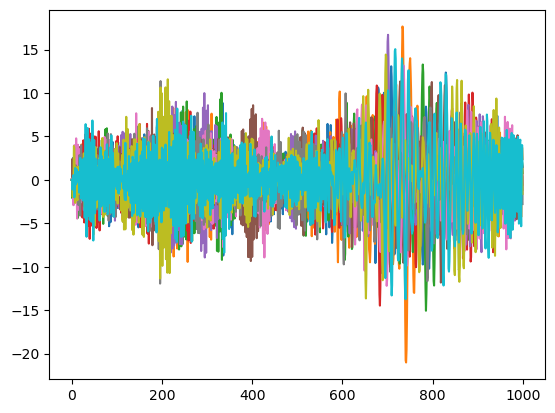

In [37]:
for replication in range(10):
    plt.plot(X_tvar_2_replications[replication])
    #plt.plot(X_tvar_2_replications[replication])

In [38]:
t = [10, 20, 50]
X_tvar_2_10 = []
X_tvar_2_20 = []
X_tvar_2_50 = []
for replication in range(n_replications):
    X_tvar_2_10.append(X_tvar_2_replications[replication][9])
    X_tvar_2_20.append(X_tvar_2_replications[replication][19])
    X_tvar_2_50.append(X_tvar_2_replications[replication][49])

X_tvar_2_10 = np.array(X_tvar_2_10)
X_tvar_2_20 = np.array(X_tvar_2_20)
X_tvar_2_50 = np.array(X_tvar_2_50)

<Axes: >

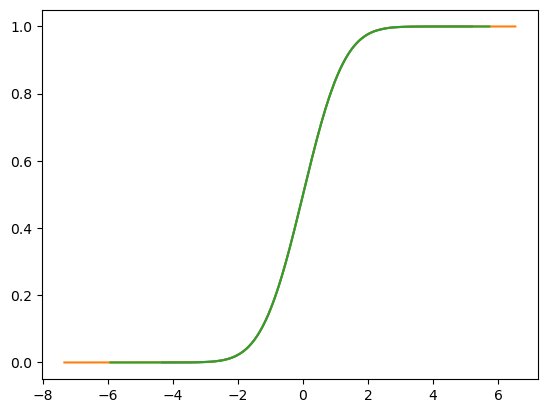

In [39]:
import scipy
import seaborn as sns
norm_X_tvar_2_10 = scipy.stats.norm.cdf(X_tvar_2_10)
norm_X_tvar_2_20 = scipy.stats.norm.cdf(X_tvar_2_20)
norm_X_tvar_2_50 = scipy.stats.norm.cdf(X_tvar_2_50)

sns.lineplot(x=X_tvar_2_10, y=norm_X_tvar_2_10)
sns.lineplot(x=X_tvar_2_20, y=norm_X_tvar_2_20)
sns.lineplot(x=X_tvar_2_50, y=norm_X_tvar_2_50)

In [40]:
## Gaussian 
xi = 0.4 / (2*(d+1))
bandwith = T **(-xi)
t = 50
gaussian_kernel = Kernel(T=T, bandwith=bandwith, space_kernel="gaussian", time_kernel="gaussian")

gaussian_weights = {}
gaussian_weights_ = {}
for replication in range(n_replications):
    gaussian_weights[str(replication)] = gaussian_kernel.fit(X_dict[str(replication)], t)
    gaussian_weights_[str(replication)] = gaussian_weights[str(replication)].sum(axis=0)
    

weights_10 = {}
weights_20 = {}
weights_50 = {}
for replication in range(n_replications):
    weights_10[str(replication)] = gaussian_weights[str(replication)] 
    weights_20[str(replication)] = gaussian_weights[str(replication)]
    weights_50[str(replication)] = gaussian_weights[str(replication)]


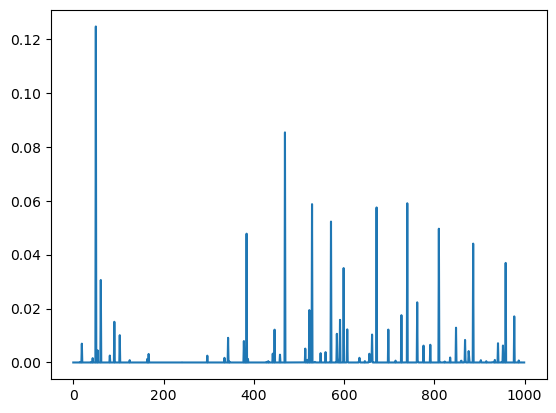

In [41]:
import pandas as pd
df_weights = pd.DataFrame(weights_50['0'])
df_weights.head(50)
#plt.plot(weights_10['1'])

plt.plot(weights_50['0'])

In [42]:
replicated_NW_cdfs_50 = {}
for replication in range(n_replications):
    X_tvar_2_replication_norm = scp.stats.norm.cdf(X_tvar_2_replications[replication])
    replicated_NW_cdfs_50[str(replication)] = weights_50[str(replication)].sum(0)* X_tvar_2_replication_norm # [49] 
    # replicated_NW_cdfs_100[str(replication)] = weights_100[str(replication)]* X_tvar_2_replication_norm 

<Axes: >

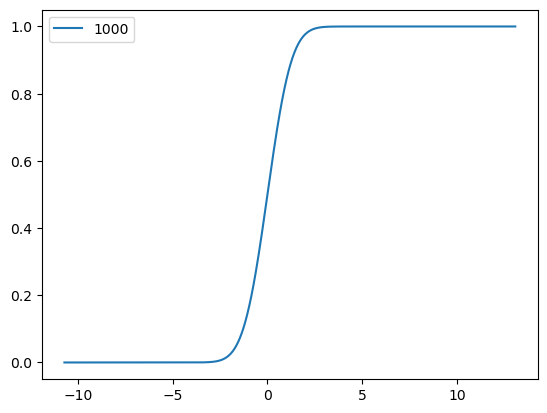

In [43]:
# X_tvar_2_replication_norm[0]
X_tvar_2_replication_norm = scp.stats.norm.cdf(X_tvar_2_replications[0])
# plt.plot(X_tvar_2_replication_norm)

sns.lineplot(x=X_tvar_2_replications[0], y=X_tvar_2_replication_norm, label=f"{T}" )

(300, 1000) (300, 1000)


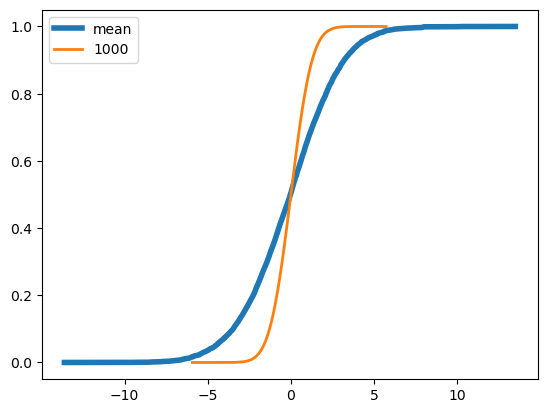

Wasserstein distance for each replication:  [0.19804252424533644, 0.24157266224937385, 0.16635227244186332, 0.14973371515061187, 0.08013254540738685, 0.03232797895005284, 0.15334017529579802, 0.11146249711809753, 0.26078576159347105, 0.31557286395636314, 0.018523742543576922, 0.13265537278382272, 0.40323175134848704, 0.15676866156187683, 0.12548394760557674, 0.054276932794417726, 0.07730980373368068, 0.09276020037379383, 0.24895807191712244, 0.06836511939515, 0.025296532652115844, 0.04263516606254284, 0.14238065029016428, 0.08761339676421082, 0.09502491740681945, 0.10448113971423251, 0.15159818459550273, 0.20132074268955255, 0.11005628437442601, 0.30401182655737746, 0.15355620840940393, 0.1178479548562259, 0.19433904839168203, 0.1720901981842503, 0.1855258684254465, 0.09268609227084809, 0.08854298141476409, 0.3042439670261985, 0.05585617786272861, 0.03994333412764896, 0.14857475917986437, 0.20674158202667128, 0.2264114024460038, 0.17664716044830236, 0.047519363568805, 0.184689291853031

In [45]:
from scipy.stats import wasserstein_distance
x_rep = np.zeros((n_replications, T))
y_rep = np.zeros((n_replications, T))
wasserstein_distances = []
for replication in range(n_replications): #range(n_replications):
   # sns.lineplot(x=X_tvar_2_replications[replication], y=replicated_NW_cdfs_100[str(replication)])
   # plt.ecdf(X_tvar_2_replications[replication], weights=weights_100[str(replication)][99])
   # sns.ecdfplot(data=None, x=X_tvar_2_replications[replication], weights=weights_100[str(replication)][99])
   # data = X_tvar_2_replications[replication] * weights_100[str(replication)][99]
   # plt.plot(np.sort(a), np.linspace(0., 1., len(a), endpoint=False), c='g',lw=2)
   # plt.plot(np.sort(data), np.arange(1, len(data)+1) / len(data))
    y, x = eval_univariate(X_tvar_2_replications[replication], weights_50[str(replication)])
    x_rep[replication] = x
    y_rep[replication] = y
    distance = wasserstein_distance(y, scp.stats.norm.cdf(X_tvar_2_50))
    wasserstein_distances.append(distance)
   
   
   #plt.plot(x, y, label=str(replication))
print(x_rep.shape, y_rep.shape)
plt.plot(x_rep.mean(axis=0), y_rep.mean(axis=0), label="mean", linewidth=4)
X_tvar_2_50_norm = scp.stats.norm.cdf(X_tvar_2_50)
sns.lineplot(x=X_tvar_2_50, y=X_tvar_2_50_norm, label=f"{T}", linewidth=2 )
# eval_univariate(X_tvar_2_100_norm)
# plt.legend()
plt.show()

#print("Mean values of y_rep across replications:", y_rep.mean(axis=0))
#y_rep.mean(axis=0).shape
print("Wasserstein distance for each replication: ", wasserstein_distances)

In [46]:
#x_mean_pi_NW_cdfs_50 = x_rep.mean(axis=0)
y_mean_pi_NW_cdfs_50 = y_rep.mean(axis=0)

from scipy.stats import wasserstein_distance
wasserstein_distance(y_mean_pi_NW_cdfs_50, X_tvar_2_50_norm)

0.08769944057958406

# n_replications=400

In [47]:
T = 1000
n_replications = 400
d = 2

u_var = np.linspace(0., 1., T)

X_tvar_2 = np.zeros(T)
X_tvar_2_mean = np.zeros(T)


m_star = lambda u: 1.4 + np.sin(2 * np.pi * u)
r_star = lambda  u: 1.05
sigma_star = lambda u: 1.0

X_tvar_2_replications = np.zeros((n_replications, T))

X_dict = {}

for replication in range(n_replications):
    np.random.seed(replication)
    t = 2
    epsilon = np.random.normal(size=(T))
    X = np.zeros((T,d))
    while t <= T-1 :
        X_tvar_2[t] = 2 / r_star(t/T) * np.cos(m_star(t/T)) * X_tvar_2[t-1] - \
                        (1. / r_star(t/T) ** 2) * X_tvar_2[t-2] + sigma_star(t/T) * epsilon[t]
        X_tvar_2_mean[t] = 2 / r_star(t/T) * np.cos(m_star(t/T)) * X_tvar_2[t-1] - \
                        (1. / r_star(t/T) ** 2) * X_tvar_2[t-2]
        X[t] = [X_tvar_2[t-1], X_tvar_2[t-2]]
        t += 1
        
    X_dict[str(replication)] = X
    # X_dict.setdefault(str(replication),[]).append(X)
    X_tvar_2_replications[replication] = X_tvar_2

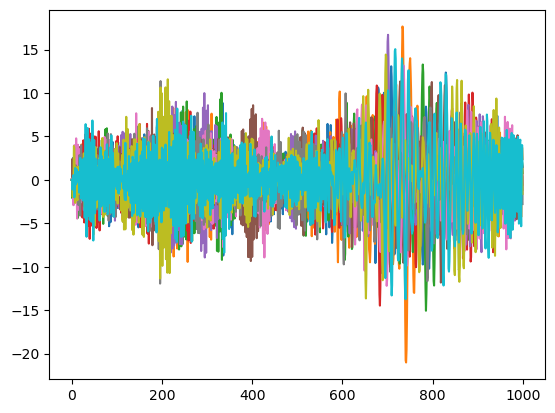

In [48]:
for replication in range(10):
    plt.plot(X_tvar_2_replications[replication])
    #plt.plot(X_tvar_2_replications[replication])

In [49]:
t = [10, 20, 50]
X_tvar_2_10 = []
X_tvar_2_20 = []
X_tvar_2_50 = []
for replication in range(n_replications):
    X_tvar_2_10.append(X_tvar_2_replications[replication][9])
    X_tvar_2_20.append(X_tvar_2_replications[replication][19])
    X_tvar_2_50.append(X_tvar_2_replications[replication][49])

X_tvar_2_10 = np.array(X_tvar_2_10)
X_tvar_2_20 = np.array(X_tvar_2_20)
X_tvar_2_50 = np.array(X_tvar_2_50)

<Axes: >

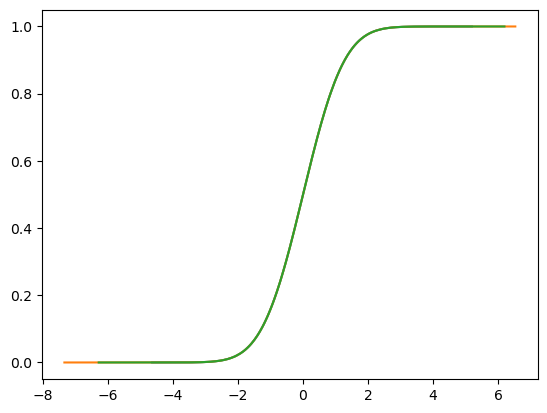

In [50]:
import scipy
import seaborn as sns
norm_X_tvar_2_10 = scipy.stats.norm.cdf(X_tvar_2_10)
norm_X_tvar_2_20 = scipy.stats.norm.cdf(X_tvar_2_20)
norm_X_tvar_2_50 = scipy.stats.norm.cdf(X_tvar_2_50)

sns.lineplot(x=X_tvar_2_10, y=norm_X_tvar_2_10)
sns.lineplot(x=X_tvar_2_20, y=norm_X_tvar_2_20)
sns.lineplot(x=X_tvar_2_50, y=norm_X_tvar_2_50)

In [51]:
## Gaussian 
xi = 0.4 / (2*(d+1))
bandwith = T **(-xi)
t = 50
gaussian_kernel = Kernel(T=T, bandwith=bandwith, space_kernel="gaussian", time_kernel="gaussian")

gaussian_weights = {}
gaussian_weights_ = {}
for replication in range(n_replications):
    gaussian_weights[str(replication)] = gaussian_kernel.fit(X_dict[str(replication)], t)
    gaussian_weights_[str(replication)] = gaussian_weights[str(replication)].sum(axis=0)
    

weights_10 = {}
weights_20 = {}
weights_50 = {}
for replication in range(n_replications):
    weights_10[str(replication)] = gaussian_weights[str(replication)] 
    weights_20[str(replication)] = gaussian_weights[str(replication)]
    weights_50[str(replication)] = gaussian_weights[str(replication)]


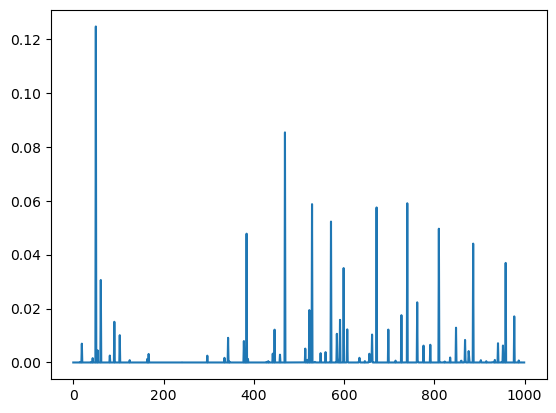

In [52]:
import pandas as pd
df_weights = pd.DataFrame(weights_50['0'])
df_weights.head(50)
#plt.plot(weights_10['1'])

plt.plot(weights_50['0'])

In [53]:
replicated_NW_cdfs_50 = {}
for replication in range(n_replications):
    X_tvar_2_replication_norm = scp.stats.norm.cdf(X_tvar_2_replications[replication])
    replicated_NW_cdfs_50[str(replication)] = weights_50[str(replication)].sum(0)* X_tvar_2_replication_norm # [49] 
    # replicated_NW_cdfs_100[str(replication)] = weights_100[str(replication)]* X_tvar_2_replication_norm 

<Axes: >

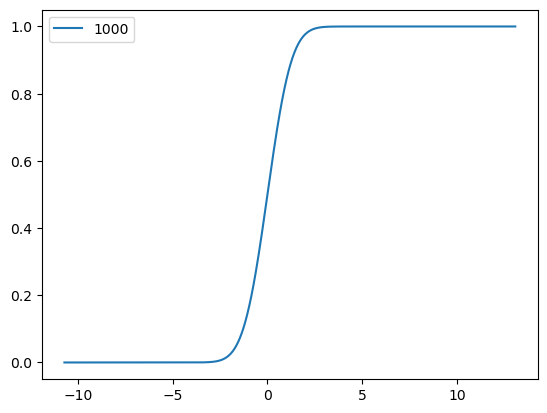

In [54]:
# X_tvar_2_replication_norm[0]
X_tvar_2_replication_norm = scp.stats.norm.cdf(X_tvar_2_replications[0])
# plt.plot(X_tvar_2_replication_norm)

sns.lineplot(x=X_tvar_2_replications[0], y=X_tvar_2_replication_norm, label=f"{T}" )

(400, 1000) (400, 1000)


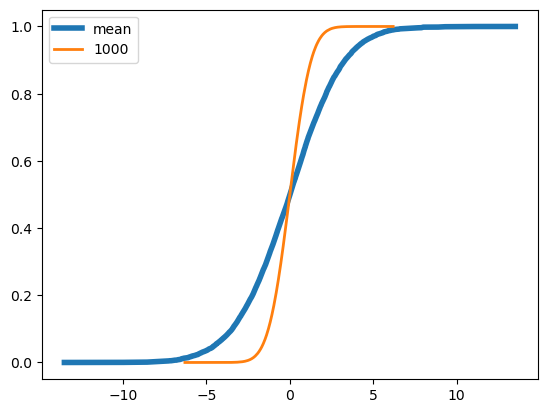

Wasserstein distance for each replication:  [0.20734100233501057, 0.2299075700587267, 0.1546875054885433, 0.16254390473310795, 0.08400825692896516, 0.023658745768395818, 0.1416911844808943, 0.10746669204763398, 0.2490033544110455, 0.30390745417570164, 0.014374284775324809, 0.13253267282541317, 0.39156682801415427, 0.16843341996280026, 0.1342634297706637, 0.0426117085419347, 0.07691394120521194, 0.1065793394390934, 0.2606228406561401, 0.05716279598919349, 0.03394935197803092, 0.039428485217979155, 0.14123534493704643, 0.097028068388507, 0.09101324703691673, 0.11787641701235405, 0.16326293630039057, 0.21298549512622802, 0.12172084565489774, 0.2923467276577603, 0.16663742518505056, 0.11650353017633527, 0.19011307511114636, 0.18375495168299347, 0.17386110215933254, 0.08401892623884727, 0.07687584657258661, 0.31590872230655104, 0.05213121040223743, 0.05169082577013783, 0.16023950424782346, 0.19507665345467357, 0.23099120797836317, 0.16498217899063755, 0.05967635055634751, 0.1963540466038257

In [55]:
from scipy.stats import wasserstein_distance
x_rep = np.zeros((n_replications, T))
y_rep = np.zeros((n_replications, T))
wasserstein_distances = []
for replication in range(n_replications): #range(n_replications):
   # sns.lineplot(x=X_tvar_2_replications[replication], y=replicated_NW_cdfs_100[str(replication)])
   # plt.ecdf(X_tvar_2_replications[replication], weights=weights_100[str(replication)][99])
   # sns.ecdfplot(data=None, x=X_tvar_2_replications[replication], weights=weights_100[str(replication)][99])
   # data = X_tvar_2_replications[replication] * weights_100[str(replication)][99]
   # plt.plot(np.sort(a), np.linspace(0., 1., len(a), endpoint=False), c='g',lw=2)
   # plt.plot(np.sort(data), np.arange(1, len(data)+1) / len(data))
    y, x = eval_univariate(X_tvar_2_replications[replication], weights_50[str(replication)])
    x_rep[replication] = x
    y_rep[replication] = y
    distance = wasserstein_distance(y, scp.stats.norm.cdf(X_tvar_2_50))
    wasserstein_distances.append(distance)
   
   
   #plt.plot(x, y, label=str(replication))
print(x_rep.shape, y_rep.shape)
plt.plot(x_rep.mean(axis=0), y_rep.mean(axis=0), label="mean", linewidth=4)
X_tvar_2_50_norm = scp.stats.norm.cdf(X_tvar_2_50)
sns.lineplot(x=X_tvar_2_50, y=X_tvar_2_50_norm, label=f"{T}", linewidth=2 )
# eval_univariate(X_tvar_2_100_norm)
# plt.legend()
plt.show()

#print("Mean values of y_rep across replications:", y_rep.mean(axis=0))
#y_rep.mean(axis=0).shape
print("Wasserstein distance for each replication: ", wasserstein_distances)

In [56]:
#x_mean_pi_NW_cdfs_50 = x_rep.mean(axis=0)
y_mean_pi_NW_cdfs_50 = y_rep.mean(axis=0)

from scipy.stats import wasserstein_distance
wasserstein_distance(y_mean_pi_NW_cdfs_50, X_tvar_2_50_norm)

0.09668757667964248

# n_replications=500

In [57]:
T = 1000
n_replications = 500
d = 2

u_var = np.linspace(0., 1., T)

X_tvar_2 = np.zeros(T)
X_tvar_2_mean = np.zeros(T)


m_star = lambda u: 1.4 + np.sin(2 * np.pi * u)
r_star = lambda  u: 1.05
sigma_star = lambda u: 1.0

X_tvar_2_replications = np.zeros((n_replications, T))

X_dict = {}

for replication in range(n_replications):
    np.random.seed(replication)
    t = 2
    epsilon = np.random.normal(size=(T))
    X = np.zeros((T,d))
    while t <= T-1 :
        X_tvar_2[t] = 2 / r_star(t/T) * np.cos(m_star(t/T)) * X_tvar_2[t-1] - \
                        (1. / r_star(t/T) ** 2) * X_tvar_2[t-2] + sigma_star(t/T) * epsilon[t]
        X_tvar_2_mean[t] = 2 / r_star(t/T) * np.cos(m_star(t/T)) * X_tvar_2[t-1] - \
                        (1. / r_star(t/T) ** 2) * X_tvar_2[t-2]
        X[t] = [X_tvar_2[t-1], X_tvar_2[t-2]]
        t += 1
        
    X_dict[str(replication)] = X
    # X_dict.setdefault(str(replication),[]).append(X)
    X_tvar_2_replications[replication] = X_tvar_2

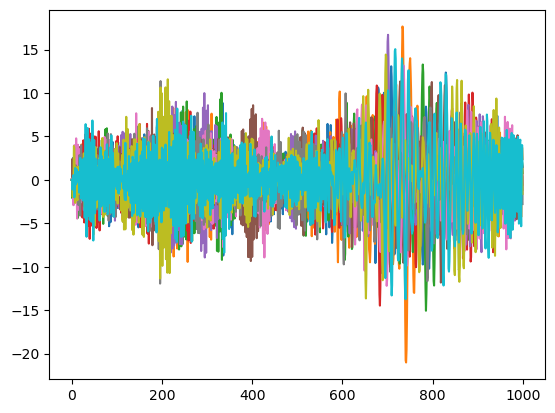

In [58]:
for replication in range(10):
    plt.plot(X_tvar_2_replications[replication])
    #plt.plot(X_tvar_2_replications[replication])

In [59]:
t = [10, 20, 50]
X_tvar_2_10 = []
X_tvar_2_20 = []
X_tvar_2_50 = []
for replication in range(n_replications):
    X_tvar_2_10.append(X_tvar_2_replications[replication][9])
    X_tvar_2_20.append(X_tvar_2_replications[replication][19])
    X_tvar_2_50.append(X_tvar_2_replications[replication][49])

X_tvar_2_10 = np.array(X_tvar_2_10)
X_tvar_2_20 = np.array(X_tvar_2_20)
X_tvar_2_50 = np.array(X_tvar_2_50)

<Axes: >

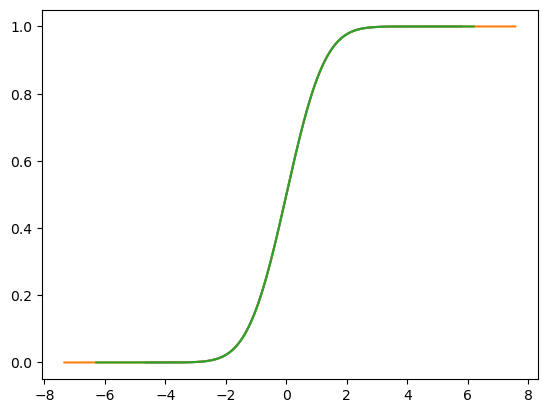

In [60]:
import scipy
import seaborn as sns
norm_X_tvar_2_10 = scipy.stats.norm.cdf(X_tvar_2_10)
norm_X_tvar_2_20 = scipy.stats.norm.cdf(X_tvar_2_20)
norm_X_tvar_2_50 = scipy.stats.norm.cdf(X_tvar_2_50)

sns.lineplot(x=X_tvar_2_10, y=norm_X_tvar_2_10)
sns.lineplot(x=X_tvar_2_20, y=norm_X_tvar_2_20)
sns.lineplot(x=X_tvar_2_50, y=norm_X_tvar_2_50)

In [61]:
## Gaussian 
xi = 0.4 / (2*(d+1))
bandwith = T **(-xi)
t = 50
gaussian_kernel = Kernel(T=T, bandwith=bandwith, space_kernel="gaussian", time_kernel="gaussian")

gaussian_weights = {}
gaussian_weights_ = {}
for replication in range(n_replications):
    gaussian_weights[str(replication)] = gaussian_kernel.fit(X_dict[str(replication)], t)
    gaussian_weights_[str(replication)] = gaussian_weights[str(replication)].sum(axis=0)
    

weights_10 = {}
weights_20 = {}
weights_50 = {}
for replication in range(n_replications):
    weights_10[str(replication)] = gaussian_weights[str(replication)] 
    weights_20[str(replication)] = gaussian_weights[str(replication)]
    weights_50[str(replication)] = gaussian_weights[str(replication)]


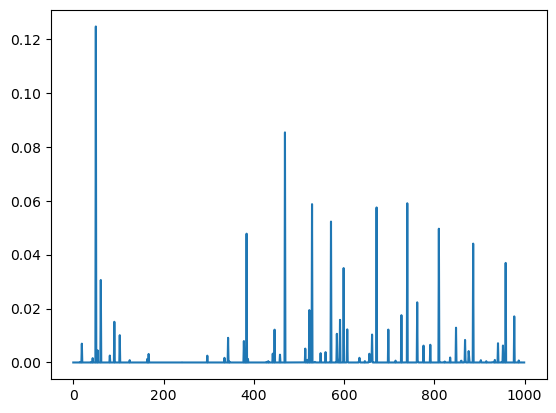

In [62]:
import pandas as pd
df_weights = pd.DataFrame(weights_50['0'])
df_weights.head(50)
#plt.plot(weights_10['1'])

plt.plot(weights_50['0'])

In [63]:
replicated_NW_cdfs_50 = {}
for replication in range(n_replications):
    X_tvar_2_replication_norm = scp.stats.norm.cdf(X_tvar_2_replications[replication])
    replicated_NW_cdfs_50[str(replication)] = weights_50[str(replication)].sum(0)* X_tvar_2_replication_norm # [49] 
    # replicated_NW_cdfs_100[str(replication)] = weights_100[str(replication)]* X_tvar_2_replication_norm 

<Axes: >

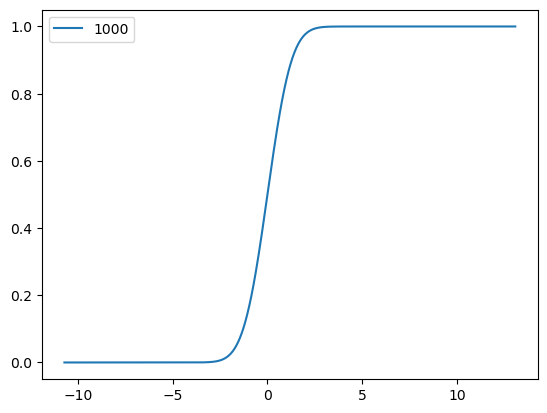

In [64]:
# X_tvar_2_replication_norm[0]
X_tvar_2_replication_norm = scp.stats.norm.cdf(X_tvar_2_replications[0])
# plt.plot(X_tvar_2_replication_norm)

sns.lineplot(x=X_tvar_2_replications[0], y=X_tvar_2_replication_norm, label=f"{T}" )

(500, 1000) (500, 1000)


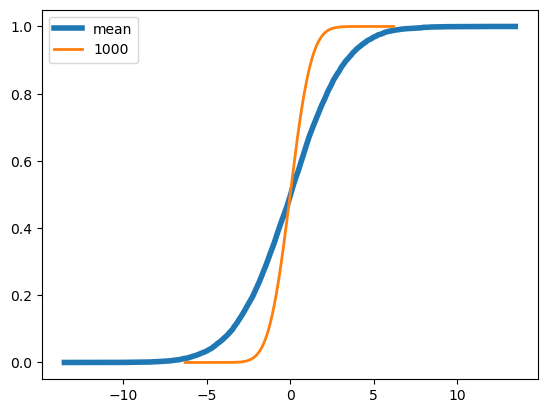

Wasserstein distance for each replication:  [0.20356929177262062, 0.22908624812862782, 0.15386558104139608, 0.16203169738474935, 0.07809472942402723, 0.02457660729353999, 0.14086328446825894, 0.10242520057021437, 0.2481857635148524, 0.3030864463156947, 0.018369059422368415, 0.12558335182263114, 0.3907450192107582, 0.16925534046593174, 0.1302159375037341, 0.04179031995196053, 0.06979699084565034, 0.10635872666799032, 0.2614447623044089, 0.056094416920988245, 0.033595639151440065, 0.03425910522277241, 0.134352851282741, 0.0935012085475989, 0.08592739584947952, 0.11719408879050655, 0.1640848605840844, 0.21380741984899437, 0.12254276749855894, 0.2915251831364886, 0.16587163585695322, 0.10973506633730243, 0.18524750291292594, 0.18457687733932648, 0.1730391777121853, 0.08229834823539638, 0.07605702608937578, 0.3167306450926615, 0.048257969495531135, 0.05171233309203638, 0.16106144073822773, 0.19425508791825902, 0.22484459343544122, 0.1641604466285866, 0.058749615149576564, 0.1971759692143401

In [66]:
from scipy.stats import wasserstein_distance
x_rep = np.zeros((n_replications, T))
y_rep = np.zeros((n_replications, T))
wasserstein_distances = []
for replication in range(n_replications): #range(n_replications):
   # sns.lineplot(x=X_tvar_2_replications[replication], y=replicated_NW_cdfs_100[str(replication)])
   # plt.ecdf(X_tvar_2_replications[replication], weights=weights_100[str(replication)][99])
   # sns.ecdfplot(data=None, x=X_tvar_2_replications[replication], weights=weights_100[str(replication)][99])
   # data = X_tvar_2_replications[replication] * weights_100[str(replication)][99]
   # plt.plot(np.sort(a), np.linspace(0., 1., len(a), endpoint=False), c='g',lw=2)
   # plt.plot(np.sort(data), np.arange(1, len(data)+1) / len(data))
    y, x = eval_univariate(X_tvar_2_replications[replication], weights_50[str(replication)])
    x_rep[replication] = x
    y_rep[replication] = y
    distance = wasserstein_distance(y, scp.stats.norm.cdf(X_tvar_2_50))
    wasserstein_distances.append(distance)
   
   
   #plt.plot(x, y, label=str(replication))
print(x_rep.shape, y_rep.shape)
plt.plot(x_rep.mean(axis=0), y_rep.mean(axis=0), label="mean", linewidth=4)
X_tvar_2_50_norm = scp.stats.norm.cdf(X_tvar_2_50)
sns.lineplot(x=X_tvar_2_50, y=X_tvar_2_50_norm, label=f"{T}", linewidth=2 )
# eval_univariate(X_tvar_2_100_norm)
# plt.legend()
plt.show()

#print("Mean values of y_rep across replications:", y_rep.mean(axis=0))
#y_rep.mean(axis=0).shape
print("Wasserstein distance for each replication: ", wasserstein_distances)

In [67]:
#x_mean_pi_NW_cdfs_50 = x_rep.mean(axis=0)
y_mean_pi_NW_cdfs_50 = y_rep.mean(axis=0)

from scipy.stats import wasserstein_distance
wasserstein_distance(y_mean_pi_NW_cdfs_50, X_tvar_2_50_norm)

0.09243133582678309

# n_replications=1000

In [68]:
T = 1000
n_replications = 1000
d = 2

u_var = np.linspace(0., 1., T)

X_tvar_2 = np.zeros(T)
X_tvar_2_mean = np.zeros(T)


m_star = lambda u: 1.4 + np.sin(2 * np.pi * u)
r_star = lambda  u: 1.05
sigma_star = lambda u: 1.0

X_tvar_2_replications = np.zeros((n_replications, T))

X_dict = {}

for replication in range(n_replications):
    np.random.seed(replication)
    t = 2
    epsilon = np.random.normal(size=(T))
    X = np.zeros((T,d))
    while t <= T-1 :
        X_tvar_2[t] = 2 / r_star(t/T) * np.cos(m_star(t/T)) * X_tvar_2[t-1] - \
                        (1. / r_star(t/T) ** 2) * X_tvar_2[t-2] + sigma_star(t/T) * epsilon[t]
        X_tvar_2_mean[t] = 2 / r_star(t/T) * np.cos(m_star(t/T)) * X_tvar_2[t-1] - \
                        (1. / r_star(t/T) ** 2) * X_tvar_2[t-2]
        X[t] = [X_tvar_2[t-1], X_tvar_2[t-2]]
        t += 1
        
    X_dict[str(replication)] = X
    # X_dict.setdefault(str(replication),[]).append(X)
    X_tvar_2_replications[replication] = X_tvar_2

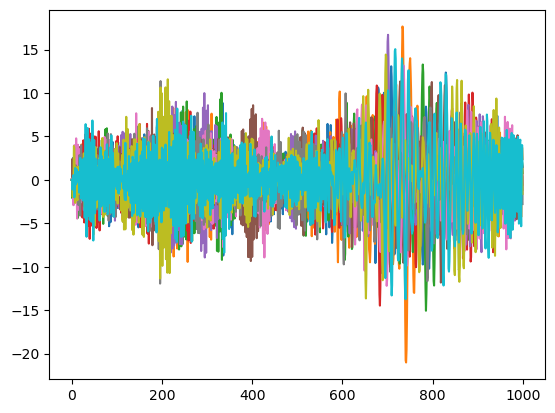

In [69]:
for replication in range(10):
    plt.plot(X_tvar_2_replications[replication])
    #plt.plot(X_tvar_2_replications[replication])

In [70]:
t = [10, 20, 50]
X_tvar_2_10 = []
X_tvar_2_20 = []
X_tvar_2_50 = []
for replication in range(n_replications):
    X_tvar_2_10.append(X_tvar_2_replications[replication][9])
    X_tvar_2_20.append(X_tvar_2_replications[replication][19])
    X_tvar_2_50.append(X_tvar_2_replications[replication][49])

X_tvar_2_10 = np.array(X_tvar_2_10)
X_tvar_2_20 = np.array(X_tvar_2_20)
X_tvar_2_50 = np.array(X_tvar_2_50)

<Axes: >

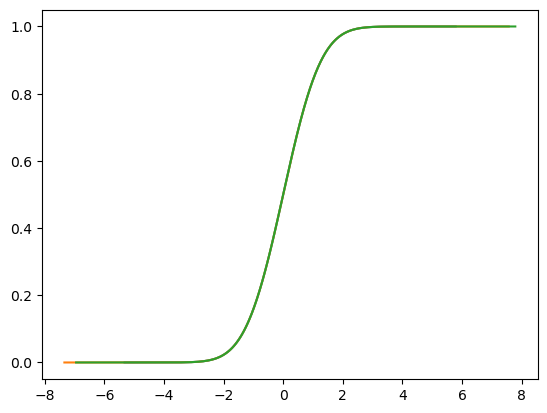

In [71]:
import scipy
import seaborn as sns
norm_X_tvar_2_10 = scipy.stats.norm.cdf(X_tvar_2_10)
norm_X_tvar_2_20 = scipy.stats.norm.cdf(X_tvar_2_20)
norm_X_tvar_2_50 = scipy.stats.norm.cdf(X_tvar_2_50)

sns.lineplot(x=X_tvar_2_10, y=norm_X_tvar_2_10)
sns.lineplot(x=X_tvar_2_20, y=norm_X_tvar_2_20)
sns.lineplot(x=X_tvar_2_50, y=norm_X_tvar_2_50)

In [72]:
## Gaussian 
xi = 0.4 / (2*(d+1))
bandwith = T **(-xi)
t = 50
gaussian_kernel = Kernel(T=T, bandwith=bandwith, space_kernel="gaussian", time_kernel="gaussian")

gaussian_weights = {}
gaussian_weights_ = {}
for replication in range(n_replications):
    gaussian_weights[str(replication)] = gaussian_kernel.fit(X_dict[str(replication)], t)
    gaussian_weights_[str(replication)] = gaussian_weights[str(replication)].sum(axis=0)
    

weights_10 = {}
weights_20 = {}
weights_50 = {}
for replication in range(n_replications):
    weights_10[str(replication)] = gaussian_weights[str(replication)] 
    weights_20[str(replication)] = gaussian_weights[str(replication)]
    weights_50[str(replication)] = gaussian_weights[str(replication)]


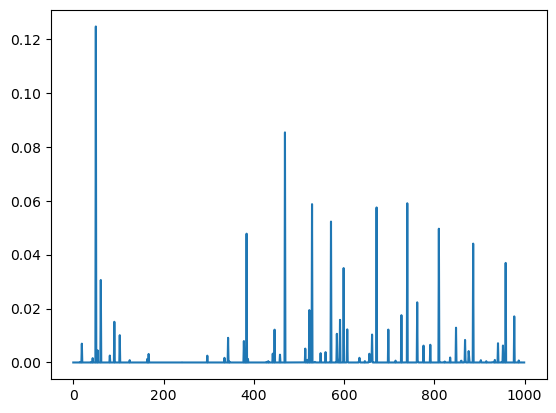

In [73]:
import pandas as pd
df_weights = pd.DataFrame(weights_50['0'])
df_weights.head(50)
#plt.plot(weights_10['1'])

plt.plot(weights_50['0'])

In [74]:
replicated_NW_cdfs_50 = {}
for replication in range(n_replications):
    X_tvar_2_replication_norm = scp.stats.norm.cdf(X_tvar_2_replications[replication])
    replicated_NW_cdfs_50[str(replication)] = weights_50[str(replication)].sum(0)* X_tvar_2_replication_norm # [49] 
    # replicated_NW_cdfs_100[str(replication)] = weights_100[str(replication)]* X_tvar_2_replication_norm 

<Axes: >

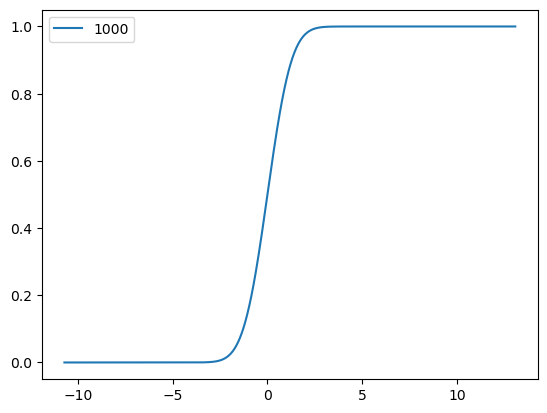

In [75]:
# X_tvar_2_replication_norm[0]
X_tvar_2_replication_norm = scp.stats.norm.cdf(X_tvar_2_replications[0])
# plt.plot(X_tvar_2_replication_norm)

sns.lineplot(x=X_tvar_2_replications[0], y=X_tvar_2_replication_norm, label=f"{T}" )

(1000, 1000) (1000, 1000)


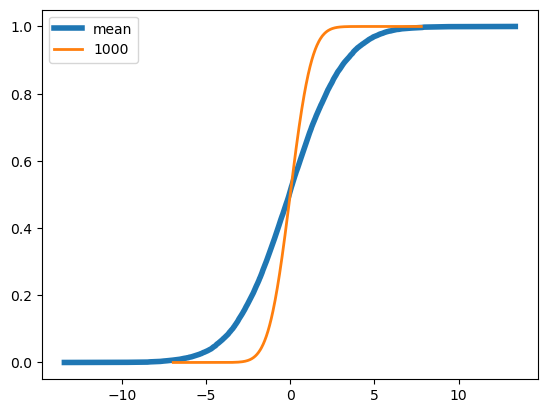

Wasserstein distance for each replication:  [0.1970285217992418, 0.24876393282681714, 0.173542371797142, 0.14938743750403458, 0.07896397229619403, 0.0394080156463127, 0.16056458903062584, 0.11748779886339683, 0.2678582181549252, 0.3227640271827943, 0.01988509841228463, 0.1344603527984586, 0.4104220242796953, 0.1495785885217792, 0.12444875176106165, 0.061467916657772265, 0.08009636317860482, 0.09360877111913854, 0.24176802491036609, 0.07548355832554167, 0.02290363086115342, 0.04942834467743965, 0.1431296432953772, 0.08657038718774335, 0.09984569600563402, 0.10539722580305018, 0.14440807883066054, 0.19413064854697656, 0.10286603064376505, 0.3112024857499467, 0.1542073210991188, 0.11907782381278542, 0.19939848852552497, 0.16490011219797085, 0.19271596778072514, 0.10037620371158415, 0.0957347540877547, 0.2970538882739124, 0.05715662318001939, 0.038499741838440765, 0.141384677826576, 0.21393258686689262, 0.22515078887565174, 0.18383759233960537, 0.0475853743422395, 0.17749920624642876, 0.10

In [76]:
from scipy.stats import wasserstein_distance
x_rep = np.zeros((n_replications, T))
y_rep = np.zeros((n_replications, T))
wasserstein_distances = []
for replication in range(n_replications): #range(n_replications):
   # sns.lineplot(x=X_tvar_2_replications[replication], y=replicated_NW_cdfs_100[str(replication)])
   # plt.ecdf(X_tvar_2_replications[replication], weights=weights_100[str(replication)][99])
   # sns.ecdfplot(data=None, x=X_tvar_2_replications[replication], weights=weights_100[str(replication)][99])
   # data = X_tvar_2_replications[replication] * weights_100[str(replication)][99]
   # plt.plot(np.sort(a), np.linspace(0., 1., len(a), endpoint=False), c='g',lw=2)
   # plt.plot(np.sort(data), np.arange(1, len(data)+1) / len(data))
    y, x = eval_univariate(X_tvar_2_replications[replication], weights_50[str(replication)])
    x_rep[replication] = x
    y_rep[replication] = y
    distance = wasserstein_distance(y, scp.stats.norm.cdf(X_tvar_2_50))
    wasserstein_distances.append(distance)
   
   
   #plt.plot(x, y, label=str(replication))
print(x_rep.shape, y_rep.shape)
plt.plot(x_rep.mean(axis=0), y_rep.mean(axis=0), label="mean", linewidth=4)
X_tvar_2_50_norm = scp.stats.norm.cdf(X_tvar_2_50)
sns.lineplot(x=X_tvar_2_50, y=X_tvar_2_50_norm, label=f"{T}", linewidth=2 )
# eval_univariate(X_tvar_2_100_norm)
# plt.legend()
plt.show()

#print("Mean values of y_rep across replications:", y_rep.mean(axis=0))
#y_rep.mean(axis=0).shape
print("Wasserstein distance for each replication: ", wasserstein_distances)

In [77]:
#x_mean_pi_NW_cdfs_50 = x_rep.mean(axis=0)
y_mean_pi_NW_cdfs_50 = y_rep.mean(axis=0)

from scipy.stats import wasserstein_distance
wasserstein_distance(y_mean_pi_NW_cdfs_50, X_tvar_2_50_norm)

0.08692377170179638